# MNIST Digits (Quantum)

This notebooks trains and evaluates quantum vision transformers for the MNIST Digits classification task.
You can find information about the dataset at https://www.tensorflow.org/datasets/catalog/mnist.

In [1]:
import jax

from quantum_transformers.utils import plot_image
from quantum_transformers.datasets import get_mnist_dataloaders
from quantum_transformers.training import train_and_evaluate
from quantum_transformers.transformers import VisionTransformer
from quantum_transformers.quantum_layer import get_circuit

data_dir = '/global/cfs/cdirs/m4392/salcc/data'

2023-10-09 15:09:18.296794: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-09 15:09:18.296822: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-09 15:09:18.296844: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-09 15:09:19.733928: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Please first ``pip install -U cirq`` to enable related functionality in translation module


The models are trained using the following devices:

In [2]:
for d in jax.devices():
    print(d, d.device_kind)

gpu:0 NVIDIA A100-SXM4-40GB


Let's check how many samples the dataset has, the shape of the input data, and how one sample looks like.

Cardinalities (train, val, test): 54000 6000 10000
(28, 28, 1)


2023-10-09 15:09:23.844425: W tensorflow/core/kernels/data/cache_dataset_ops.cc:854] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


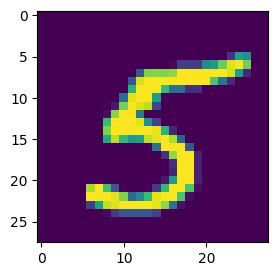

In [3]:
mnist_train_dataloader, mnist_valid_dataloader, mnist_test_dataloader = get_mnist_dataloaders(batch_size=64, data_dir=data_dir)
first_image = next(iter(mnist_train_dataloader))[0][0]
print(first_image.shape)
plot_image(first_image)

Now let's train the quantum vision transformer on the best hyperparameters found using random hyperparameter search.

In [4]:
model = VisionTransformer(num_classes=10, patch_size=14, hidden_size=6, num_heads=2, num_transformer_blocks=4, mlp_hidden_size=3,
                          quantum_attn_circuit=get_circuit(), quantum_mlp_circuit=get_circuit())
train_and_evaluate(model, mnist_train_dataloader, mnist_valid_dataloader, mnist_test_dataloader, num_classes=10, num_epochs=30)

2023-10-09 15:09:25.510151: W tensorflow/core/kernels/data/cache_dataset_ops.cc:854] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


Number of parameters = 1672


Epoch  30/30: 100%|██████████| 843/843 [00:10<00:00, 83.15batch/s, Loss = 0.3831, AUC = 98.91%] 


Total training time = 338.45s, best validation AUC = 98.92% at epoch 29


Testing: 100%|██████████| 156/156 [00:04<00:00, 38.56batch/s, Loss = 0.3841, AUC = 98.94%] 


(Array(0.38410008, dtype=float32), 98.94037686108435, [], [])